<a href="https://colab.research.google.com/github/Shruthidn27/Neural-Network-Regression-Model/blob/main/exp01(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [3]:
dataset = pd.read_csv('/content/DATASET - Sheet1.csv')
X = dataset[['INPUT']].values
y = dataset[['OUTPUT']].values


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [7]:
# Name:SHRUTHI D.N
# Register Number:212223240155
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,16)
        self.fc3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(ai_brain.parameters(), lr=0.001)

In [9]:
def train_model(ai_brain, criterion, optimizer, X_train_tensor, y_train_tensor, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        # Using X_train_tensor and y_train_tensor here
        loss = criterion(ai_brain(X_train_tensor), y_train_tensor)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

In [10]:
train_model(ai_brain, criterion, optimizer, X_train_tensor, y_train_tensor)

Epoch 0, Loss: 12887.361328
Epoch 200, Loss: 11843.996094
Epoch 400, Loss: 7656.132812
Epoch 600, Loss: 3028.642822
Epoch 800, Loss: 1800.413452
Epoch 1000, Loss: 1609.307739
Epoch 1200, Loss: 1445.624390
Epoch 1400, Loss: 1277.734863
Epoch 1600, Loss: 1105.303833
Epoch 1800, Loss: 928.761169


In [11]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 923.253357


In [12]:
loss_df = pd.DataFrame(ai_brain.history)

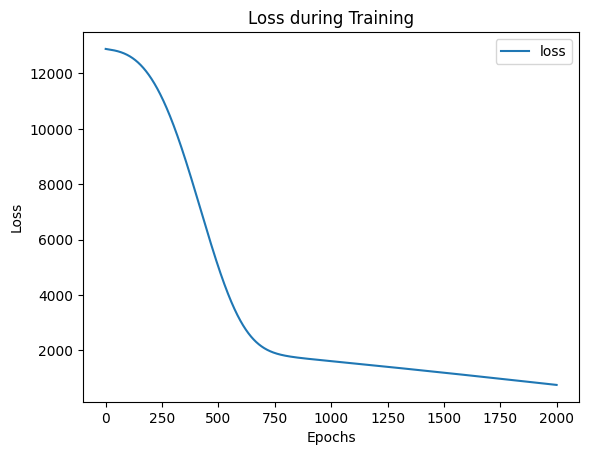

In [13]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [19]:
X_n1_1 = torch.tensor([[7]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')


Prediction: 89.94351959228516


In [17]:
X_n1_1 = torch.tensor([[6]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 84.85834503173828
